In [23]:
# https://www.rdkit.org/
import rdkit
#https://github.com/rdkit/rdkit
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
# https://pandas.pydata.org
import pandas as pd

# https://numpy.org/doc/stable/release.html
import numpy as np

#https://github.com/mordred-descriptor/mordred
#from mordred import Calculator, descriptors

from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D

In [24]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
#---------------------- RDKit packages
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina
#------------------- progress bar
from tqdm import tqdm
#------------------- hide warning
import warnings
warnings.filterwarnings('ignore')

In [25]:
from rdkit.Chem.Draw import IPythonConsole
from ipywidgets import interact,fixed,IntSlider
def renderFpBit(mol,bitIdx,bitInfo,fn):
    bid = bitIdx
    return(display(fn(mol,bid,bitInfo), mol))

In [26]:
name1 = "CCCC(C)O"
m1 = Chem.MolFromSmiles(name1)
name2 = "CCC(CC)O"
m2 = Chem.MolFromSmiles(name2)

# Interact find Index

In [27]:
from rdkit.Chem.Draw import IPythonConsole
from ipywidgets import interact,fixed,IntSlider
def renderFpBit(mol,bitIdx,bitInfo,fn):
    bid = bitIdx
    return(display(fn(mol,bid,bitInfo)))

In [28]:
rdkbi = {}
rdkfp = Chem.RDKFingerprint(m1, maxPath=5, bitInfo=rdkbi)
# show 10 of the set bits:
list(rdkfp.GetOnBits())[:10]

[56, 148, 229, 491, 562, 568, 709, 747, 875, 1067]

In [29]:
interact(renderFpBit, bitIdx=list(rdkbi.keys()),mol=fixed(m1),
         bitInfo=fixed(rdkbi),fn=fixed(Draw.DrawRDKitBit));


interactive(children=(Dropdown(description='bitIdx', options=(56, 148, 229, 491, 562, 568, 709, 747, 875, 1067…

In [30]:
info = {}
morgan_fp=AllChem.GetMorganFingerprintAsBitVect(m2, 3, nBits=2048, bitInfo=info, useFeatures=True)

In [31]:
interact(renderFpBit, bitIdx=list(info.keys()),mol=fixed(m2),
         bitInfo=fixed(info),fn=fixed(Draw.DrawMorganBit));

interactive(children=(Dropdown(description='bitIdx', options=(0, 3, 383, 792, 1085, 1386, 1687, 2041), value=0…

# Bit No.90 is XXX

In [32]:
def get_index_of_array_that_contain_1_in_any_position(list1):
  result = []
  for i, e in enumerate(list1):
    if e == 1:
      result.append(i)
  return result

In [49]:
from rdkit import Chem
from rdkit.Chem.rdMolDescriptors import GetHashedMorganFingerprint

mol1 = Chem.MolFromSmiles('CCCCCO')
mol2 = Chem.MolFromSmiles('CCCCO')
mol3 = Chem.MolFromSmiles('CCCC(C)O')
mol4 = Chem.MolFromSmiles('CCC(CC)O')
bit_info1 = {}
bit_info2 = {}
bit_info3 = {}
bit_info4 = {}
fp1 = GetHashedMorganFingerprint(mol1, 3, bitInfo=bit_info1, useFeatures=True)
fp2 = GetHashedMorganFingerprint(mol2, 3, bitInfo=bit_info2, useFeatures=True)
fp3 = GetHashedMorganFingerprint(mol3, 3, bitInfo=bit_info3, useFeatures=True)
fp4 = GetHashedMorganFingerprint(mol4, 3, bitInfo=bit_info4, useFeatures=True)

In [50]:
print(get_index_of_array_that_contain_1_in_any_position(list(fp1)))
print(get_index_of_array_that_contain_1_in_any_position(list(fp2)))
print(get_index_of_array_that_contain_1_in_any_position(list(fp3)))
print(get_index_of_array_that_contain_1_in_any_position(list(fp4)))

[3, 490, 539, 545, 805, 1085, 1361, 1488, 2041]
[3, 490, 539, 545, 805, 1085, 2041]
[3, 352, 539, 1587, 1687, 2041]
[3, 383, 1687, 2041]


In [51]:
mol = Chem.MolFromSmiles('CCCCCO')
bit_info = {}
fp = GetHashedMorganFingerprint(mol, 3, bitInfo=bit_info, useFeatures=True)

In [52]:
print(get_index_of_array_that_contain_1_in_any_position(list(fp)))
atomidx, radius = bit_info[490][0]

[3, 490, 539, 545, 805, 1085, 1361, 1488, 2041]


In [53]:
print
env = Chem.FindAtomEnvironmentOfRadiusN(mol, radius, atomidx)

atomsToUse = set((atomidx, ))
for b in env:
    atomsToUse.add(mol.GetBondWithIdx(b).GetBeginAtomIdx())
    atomsToUse.add(mol.GetBondWithIdx(b).GetEndAtomIdx())

enlargedEnv = set()
for atom in atomsToUse:
    a = mol.GetAtomWithIdx(atom)
    for b in a.GetBonds():
      bidx = b.GetIdx()
      if bidx not in env:
        enlargedEnv.add(bidx)

enlargedEnv = list(enlargedEnv)
enlargedEnv += env

# find all relevant neighbors
anyAtoms = []
for a in atomsToUse:
    neighbors = mol.GetAtomWithIdx(a).GetNeighbors()
    for n in neighbors:
        anyIdx = n.GetIdx()
        if anyIdx not in atomsToUse:
            anyAtoms.append(anyIdx)

# replace atomic number to zero (there is no number for any atom)
for aA in anyAtoms:
    mol.GetAtomWithIdx(aA).SetAtomicNum(0)

submol = Chem.PathToSubmol(mol, enlargedEnv)

# change [0] to *
MorganBitSmarts = Chem.MolToSmarts(submol).replace('[#0]', '*')
print(MorganBitSmarts)

*-[#6]-[#6]-[#6]-[#8]


In [54]:
info = {}
morgan_fp=AllChem.GetMorganFingerprintAsBitVect(m2, 3, nBits=2048, bitInfo=info, useFeatures=True)

In [55]:
list(info)

[0, 3, 383, 792, 1085, 1386, 1687, 2041]

In [56]:
interact(renderFpBit, bitIdx=list(info.keys()),mol=fixed(m2),
         bitInfo=fixed(info),fn=fixed(Draw.DrawMorganBit));

interactive(children=(Dropdown(description='bitIdx', options=(0, 3, 383, 792, 1085, 1386, 1687, 2041), value=0…

# TEST

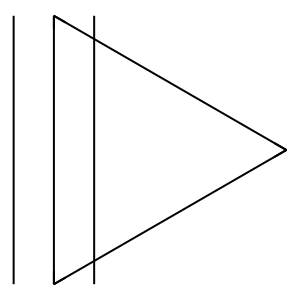

In [57]:
from rdkit import Chem
from rdkit.Chem.rdMolDescriptors import GetHashedMorganFingerprint

mol = Chem.MolFromSmiles('C1C#C1')
#mol = Chem.MolFromSmiles('C1#C=C')
img1 = Draw.MolToImage(mol)
img1